<a href="https://colab.research.google.com/github/francji1/01DAS/blob/main/lectures/lecture_04_word2vec/01ADS_L04b_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast and Furious Introduction into [Word2Vec](https://en.wikipedia.org/wiki/Word2vec)

### What is it?
It's a Natural Language Processing [NLP] algorithm that transforms words to vectors.

### When do I use it?
When I want to explore semantics of words. For example: find word's oposites, find context word etc.

### Why should I use it?
1] NLP

2] It's a general idea of mapping elements (eg. strings) onto vectors (and vectors are good to work with). I can use it for recommending next product or a song in playlist.

# How does it work?

* Word2Vec is actualy shallow Neural Network [NN] (1 hidden layer).

* **Starting point:**
    * We have N words.
    * Each word is represented by N-dimensional vector with 1 on index position and 0s elsewhere (one-hot encoding).


* We let the NN predict word's naighbours.


* We cut out only the guts of the trained NN - scored hidden leayer values for each word.


* **End point:**
    * Each word is represented by only M-dimension vector (M << N), that carries some context information.   **:-)**

### Why is it important to have vectors instead of words? Because we have the Algebra!



## Word2Vec: one-hot encoding
<img src="https://github.com/francji1/01DAS/blob/main/lectures/lecture_04_word2vec/one_hot.png?raw=1" alt="one_hot" style="width: 600px;"/>

## Word2Vec: Word2Vec output
<img src="https://github.com/francji1/01DAS/blob/main/lectures/lecture_04_word2vec/w2v_output.png?raw=1" alt="w2v_output" style="width: 600px;"/>

## Approaches:
* **Skipgram** [SG]
    * Uses neighbour words as an input to NN and central word as an output.

* **Continuous Bag Of Words** [CBOW]
    * Uses central word as an input to NN and neighbour words as an output.

## Word2Vec: Word neighborhood
<img src="https://github.com/francji1/01DAS/blob/main/lectures/lecture_04_word2vec/word_neighbour.png?raw=1" alt="word_neighbour" style="width: 600px;"/>

## Word2Vec: Skipgram method
<img src="https://github.com/francji1/01DAS/blob/main/lectures/lecture_04_word2vec/skipgram.png?raw=1" alt="skipgram" style="width: 600px;"/>

## Word2Vec: CBOW method
<img src="https://github.com/francji1/01DAS/blob/main/lectures/lecture_04_word2vec/cbow.png?raw=1" alt="skipgram" style="width: 600px;"/>

## Let's code

In [6]:
import pandas as pd
import gensim
from sklearn.manifold import TSNE

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import random

## Dataset - QUORA

In [7]:
# Load the dataset
# df = pd.read_csv("data/quora.csv")

# Read the data from the URL
df_path = "https://raw.githubusercontent.com/francji1/01DAS/refs/heads/main/lectures/lecture_04_word2vec/data/quora.csv"
df = pd.read_csv(df_path, sep=",")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
# Transfer the dataset into list of lists
def read_questions(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))

documents = []
for index, row in df.iterrows():
    documents.append(read_questions(row,"question1"))
    if row["is_duplicate"] == 0:
        documents.append(read_questions(row,"question2"))

In [9]:
# document example
documents[:4]

[['what',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market',
  'in',
  'india'],
 ['what',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market'],
 ['what', 'is', 'the', 'story', 'of', 'kohinoor', 'koh', 'noor', 'diamond'],
 ['what',
  'would',
  'happen',
  'if',
  'the',
  'indian',
  'government',
  'stole',
  'the',
  'kohinoor',
  'koh',
  'noor',
  'diamond',
  'back']]

## Model build

In [10]:
# Lets train the word2vec model using skipgram/cbow
#sg=0: CBOW method.
#sg=1: Skip-gram method.

w2v_model = gensim.models.Word2Vec(vector_size=150, window=10, min_count=5, sg=0, workers=10)
w2v_model.build_vocab(documents)  # 'documents' must be tokenized properly
w2v_model.train(corpus_iterable=documents, total_examples=len(documents), epochs=10)  # Specify number of 'epochs'


(50353720, 70289020)

## Model exploration

In [11]:
# Model vocabulary
vocabulary_words = w2v_model.wv.index_to_key
print(f"Our vocabulary has {len(vocabulary_words)} words.")

Our vocabulary has 27775 words.


In [12]:
word = 'trump'
print(f"Word {word} is represented by {len(w2v_model.wv[word])}-dim vector:")
w2v_model.wv[word]

Word trump is represented by 150-dim vector:


array([-1.3467586 ,  4.622214  , -0.19247623,  0.9604872 ,  2.16027   ,
        4.600898  , -1.5949138 ,  1.2299547 , -0.95803815,  1.5646365 ,
       -4.4009037 , -3.0266073 ,  0.09896696,  1.2804625 ,  0.23182884,
        2.7059565 , -2.2920513 , -1.2998959 ,  4.6190643 , -2.3634841 ,
       -0.5140034 ,  1.2837198 , -1.9499497 ,  1.9228021 , -3.0191302 ,
       -0.26495752,  4.0763774 , -6.2711935 , -3.2388175 ,  3.375972  ,
        0.6373958 , -1.1002932 ,  1.1296823 ,  3.9837184 ,  2.530189  ,
       -3.300208  , -1.166018  ,  1.4228761 ,  1.4431837 , -1.482757  ,
       -1.4831408 ,  2.2012982 ,  2.6373944 ,  0.5164532 ,  2.5566535 ,
        0.8496357 ,  0.22301139, -5.741163  , -2.6087196 , -0.6270412 ,
        2.0932932 ,  0.78981245,  1.795499  ,  4.7156205 ,  1.1450791 ,
       -0.5875771 ,  0.8448477 , -3.1112854 ,  0.8462809 , -1.4266648 ,
       -6.84934   ,  2.7549248 , -0.6162158 , -3.2036252 , -0.9690012 ,
       -2.0223315 , -0.93160963, -1.7007376 , -0.7128752 , -0.30

In [24]:
!pip install mpld3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 3.5 MB/s eta 0:00:00


In [25]:
import mpld3
mpld3.enable_notebook()  # Aktivuje interaktivní grafiku


In [31]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Nastavení fontu na DejaVu Sans, který podporuje více znaků
rcParams['font.family'] = 'DejaVu Sans'

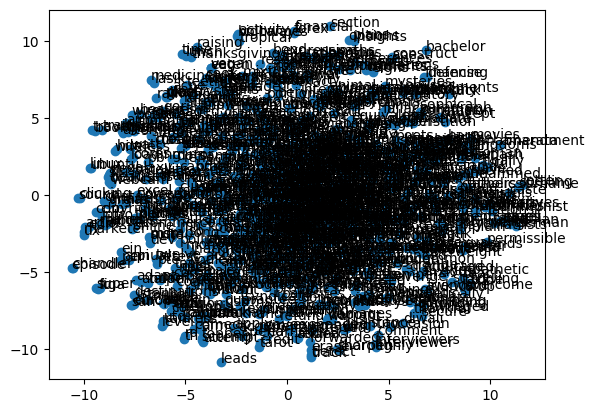

In [32]:
# TSNE representation of N words
N = 1000
wanted_vocab = random.sample(list(w2v_model.wv.index_to_key), N)  # Use index_to_key instead of vocab
X = w2v_model.wv[wanted_vocab]  # X is an array of word vectors, each vector containing 150 tokens

# TSNE transformation
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", max_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

# Plotting the TSNE result
plt.scatter(Y[:, 0], Y[:, 1])
for i, word in enumerate(wanted_vocab):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
plt.show()


In [33]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

trace = go.Scatter(
    x = Y[:,0],
    y = Y[:,1],
    text = list(wanted_vocab),  # Text zobrazí slova
    mode='markers+text',
    textposition='top center'
)

data = [trace]

# Vykreslení grafu
iplot(data)


In [23]:
# Plot
trace = go.Scatter(
    x = Y[:,0],
    y = Y[:,1],
    text = list(wanted_vocab),
    mode='text'
)

data = [trace]

# Plot and embed in ipython notebook!
iplot(data, filename='basic-scatter')

In [28]:
!pip install plotly

In [29]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Aktivuje offline režim pro plotly v Google Colabu
init_notebook_mode(connected=True)

# Plot
trace = go.Scatter(
    x = Y[:,0],
    y = Y[:,1],
    text = list(wanted_vocab),
    mode='text'
)

data = [trace]

# Plot a zobrazí se v Colabu
iplot(data)


## Using the model

In [34]:
import plotly.graph_objs as go

# Vytvoření grafu
trace = go.Scatter(
    x = Y[:,0],
    y = Y[:,1],
    text = list(wanted_vocab),
    mode='text'
)

data = [trace]

# Vytvoření a zobrazení grafu pomocí fig.show()
fig = go.Figure(data=data)
fig.show()


In [15]:
# Find similar word 1
words1 = ['trump']
w2v_model.wv.most_similar(positive=words1, topn=10)

[('trumps', 0.7282242774963379),
 ('knuth', 0.6595492362976074),
 ('hillary', 0.5542820692062378),
 ('hoffman', 0.5456559062004089),
 ('obama', 0.5425056219100952),
 ('democrats', 0.5424743294715881),
 ('kaine', 0.5216044187545776),
 ('president', 0.5145912766456604),
 ('sanders', 0.5126038193702698),
 ('republican', 0.49906110763549805)]

In [16]:
# Find similar word 2
words1 = ['panda', 'rabbit', 'dog']
w2v_model.wv.most_similar(positive=words1, topn=10)

[('snake', 0.669813334941864),
 ('hamster', 0.6434047818183899),
 ('pug', 0.6347233653068542),
 ('ramsay', 0.6341779232025146),
 ('fleas', 0.6327435374259949),
 ('leopard', 0.6325241923332214),
 ('shrimp', 0.6255281567573547),
 ('tuna', 0.6248068809509277),
 ('deer', 0.609802782535553),
 ('pigs', 0.6092745065689087)]

In [17]:
# Find similar word 4
words1 = ['husband', 'man']
words2 = ['woman']
w2v_model.wv.most_similar(positive=words1, negative=words2, topn=10)

[('wife', 0.6562424302101135),
 ('mother', 0.6207321286201477),
 ('boyfriend', 0.5896480083465576),
 ('father', 0.5855695009231567),
 ('fiancé', 0.5772231221199036),
 ('dad', 0.5690569281578064),
 ('spouse', 0.557228147983551),
 ('son', 0.5553949475288391),
 ('mom', 0.5523634552955627),
 ('brother', 0.5452151894569397)]

In [18]:
# Find similar word 5
words1 = ['president', 'trump']
words2 = ['strength']
w2v_model.wv.most_similar(positive=words1, negative=words2, topn=10)

[('republican', 0.542773425579071),
 ('obama', 0.5418720841407776),
 ('barack', 0.5366300344467163),
 ('potus', 0.5362544059753418),
 ('democrats', 0.5306541323661804),
 ('presidents', 0.5179480910301208),
 ('congress', 0.5133374333381653),
 ('senate', 0.509876549243927),
 ('kaine', 0.5077487230300903),
 ('dictator', 0.5059486031532288)]

In [19]:
# Find similar word 4
words1 = ['programming','beginner']
words2 = []
w2v_model.wv.most_similar(positive=words1, negative=words2, topn=10)

[('python', 0.7244529128074646),
 ('coding', 0.6954562067985535),
 ('java', 0.6778004765510559),
 ('programmer', 0.6775569319725037),
 ('javascript', 0.6478569507598877),
 ('php', 0.6125480532646179),
 ('haskell', 0.5957785844802856),
 ('beginners', 0.5908616781234741),
 ('newbie', 0.5846350193023682),
 ('backend', 0.5844038724899292)]

In [20]:
# What should not be there? 1
w2v_model.wv.doesnt_match(['tesla', 'bmw', 'superman', 'mercedes'])

'superman'

In [21]:
# What should not be there? 2
w2v_model.wv.doesnt_match(['trump', 'president', 'wall', 'business'])

'business'

In [22]:
# What should not be there? 3
w2v_model.wv.doesnt_match(['weed', 'beer', 'herion', 'cocain'])

'weed'

## Sources
[Wiki](https://en.wikipedia.org/wiki/Word2vec)

[Good Article 1](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/)

[Good Article 1](http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.XJfruC1_HUo)

[Tensor Flow Article](https://www.tensorflow.org/tutorials/representation/word2vec)